In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
## Part 1. Data Generation
mean_01 = np.array([1.0, 0.5])
mean_02 = np.array([6.2, 6.6])

cov_01 = np.array([[1.0, 0.1], [0.1,1.2]])
cov_02 = np.array([[1.0, 0.1], [0.1,1.0]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


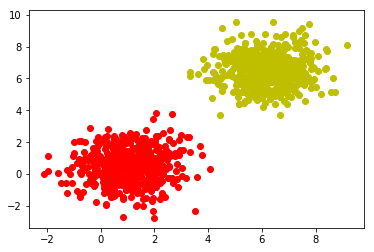

In [14]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], c='r')
plt.scatter(dist_02[:, 0], dist_02[:, 1], c='y')
plt.show()

In [15]:
## Generating the data matrix
data = np.concatenate((dist_01, dist_02))
print data.shape

d_hstack = np.hstack((dist_01, dist_02))
print d_hstack.shape

d_vstack = np.vstack((dist_01, dist_02))
print d_vstack.shape

(1000, 2)
(500, 4)
(1000, 2)


In [11]:
mat1 = np.random.random(size=(100,2))
mat2 = np.random.random(size=(200,2))
print np.vstack((mat1, mat2)).shape
## Following Code throws error
    # hstk = np.hstack((mat1, mat2))
    # print hstk.shape

(300, 2)


In [24]:
print data.min()
print data.max()
print data.shape
print data.max(axis=0).shape
print '----------------'
print data.max(axis=1).shape

-2.74453281496
9.55769696568
(1000, 2)
(2,)
----------------
(1000,)


In [30]:
## Part 2 : Initialisation of Clustering Problem
K = 4
clusters = {}
colours = ['yellow', 'red', 'pink', 'green']
for cx in range(K):
    cluster_vals = {
        'centroid' : np.random.uniform(low=data.min(), high=data.max(), size=(data.shape[1])),
        'points' : [],
        'history' : [],
        'color' : colours[cx],
    }
    clusters[cx] = cluster_vals

n_steps = 3

In [31]:
def distance(p1, p2):
    ## Eucledian Distance
    return np.sqrt(((p1-p2)**2).sum())

print distance(np.array([0.0, 0.0]), np.array([1.0, 1.0]))

1.41421356237


In [33]:
for ix in range(K):
    print clusters[ix]['color']

yellow
red
pink
green


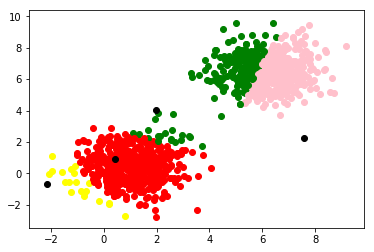

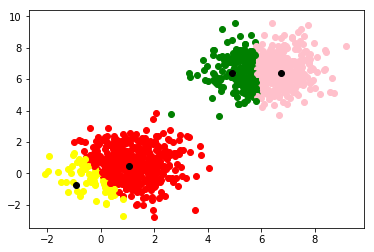

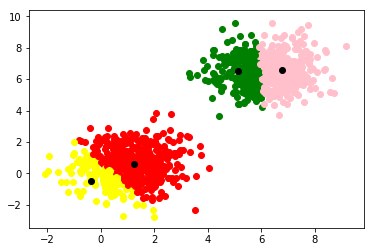

In [34]:
## Part 3 Execution Logic
for ix in range(n_steps):
    plt.figure(ix)
    for bx in range(data.shape[0]):
        d = []
        for cx in range(K):
            dis = distance(data[bx], clusters[cx]['centroid'])
            d.append(dis)
        d = np.asarray(d)
        c_id = np.argmin(d) ## Step 1 - Assigned cluster id to the particular point
        clusters[c_id]['points'].append(data[bx])
        plt.scatter(data[bx, 0], data[bx, 1], c=clusters[c_id]['color'])

    for cx in range(K):
        plt.scatter(clusters[cx]['centroid'][0],clusters[cx]['centroid'][1], c='black')
    
    ## Step 2 - Update the cluster centroid
    for cx in range(K):
        clusters[cx]['history'].append(clusters[cx]['centroid'])
        
        if len(clusters[cx]['points']) != 0:
            mean_value = np.mean(np.array(clusters[cx]['points']),axis=0)
            
            clusters[cx]['centroid'] = mean_value
        
        ## Step 3 - Reinit the points list for next iteration
        clusters[cx]['points'] = []
    
    plt.show()